# **Ensembles**

## **Carregando e preparando a base**

In [1]:
# Carregando  as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Pima Indians Diabetes Dataset

Dados originalmente fornecidos pelo National Institute of Diabetes and Digestive and Kidney Diseases. O objetivo é predizer se um determinado paciente está propenso a ter diabetes ou não a partir de outros dados clínicos e laboratoriais.

Existem diversas restrições na seleção de observações. Este subconjunto dos dados contém apenas pacientes do sexo feminino com pelo menos 21 anos de idade e com descendência indígena Pima.

Variáveis:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Resultados da árvore de decisão**
```
              precision    recall  f1-score   support
           0       0.78      0.78      0.78       157
           1       0.53      0.53      0.53        74
    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231
```

In [2]:
# Carregando a base de dados
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv')
pima.columns = col_names

In [3]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Avaliando o balanceamento da base

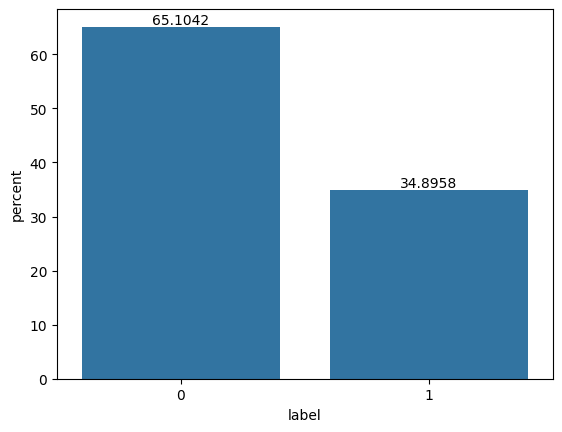

In [4]:
# Visualizando a distribuição da variável-alvo, em percentuais
ax = sns.countplot(pima, x='label', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10);

In [5]:
# Separando o dataset em variáveis independentes e variável-alvo
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Variáveis independentes
y = pima.label # Variável-alvo

In [6]:
# Dividindo a base em conjuntos de Treino e Teste (70% Treino - 30% Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **Random Forest**

In [7]:
# Importando o classificador
from sklearn.ensemble import RandomForestClassifier

# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
clf = RandomForestClassifier()

# Realizando o treino
clf.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(clf.predict(X_test))

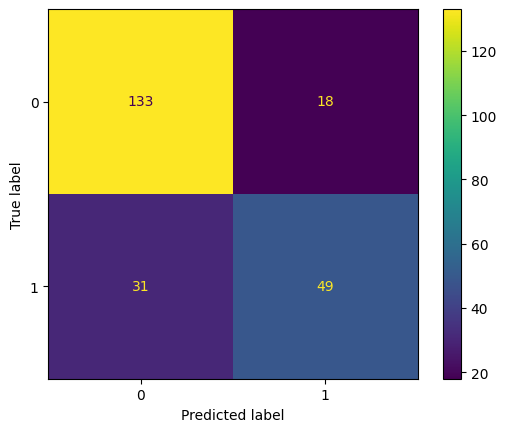

In [8]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [9]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       151
           1       0.73      0.61      0.67        80

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



**Resultados da árvore de decisão**
```
              precision    recall  f1-score   support
           0       0.78      0.78      0.78       157
           1       0.53      0.53      0.53        74
    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231
```

### **Usando o GridSearch na busca dos melhores parâmetros**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instanciando o classificador
clf = RandomForestClassifier()

param = {'criterion':['gini', 'entropy', 'log_loss'],
         'max_depth':[3,4,5,6,7,8,9,10],
         'max_features':['sqrt', 'log2']}
clf_gs = GridSearchCV(clf,param,cv=5,refit=True,scoring='accuracy',verbose=4)

# Realizando o treino
clf_gs.fit(X, y)

In [11]:
# Armazenando e apresentando as melhores combinações de parâmetros

best_estimator = clf_gs.best_params_
print(best_estimator)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}


In [12]:
# O parâmetro refit usado no GridSearch aplica o treinamento a partir da melhor
# configuração de parâmetros.
# Vamos guardar este treinamento e aplicá-lo novamente no conjunto de testes.

# Armazenando o modelo treinado
clf_gs_refit = clf_gs.best_estimator_

# Aplicando o modelo no conjunto de testes
y_pred_refit = pd.DataFrame(clf_gs_refit.predict(X_test))

# Novo Classification Report
print(classification_report(y_test, y_pred_refit))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       151
           1       0.99      0.96      0.97        80

    accuracy                           0.98       231
   macro avg       0.98      0.98      0.98       231
weighted avg       0.98      0.98      0.98       231



## **Gradient Boosting**

In [13]:
# Importando o classificador
from sklearn.ensemble import GradientBoostingClassifier

# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
clf = GradientBoostingClassifier()

# Realizando o treino
clf.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(clf.predict(X_test))

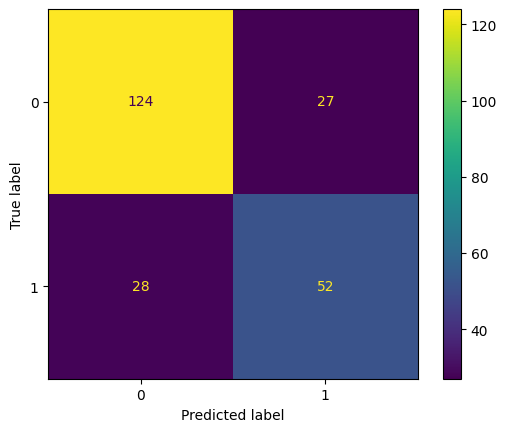

In [14]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [15]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



```
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       151
           1       0.73      0.61      0.67        80

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231
```



## **XGBoost**

In [16]:
# Importando o classificador
from xgboost import XGBClassifier

# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
xgb_clf = XGBClassifier()

# Realizando o treino
xgb_clf.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(xgb_clf.predict(X_test))

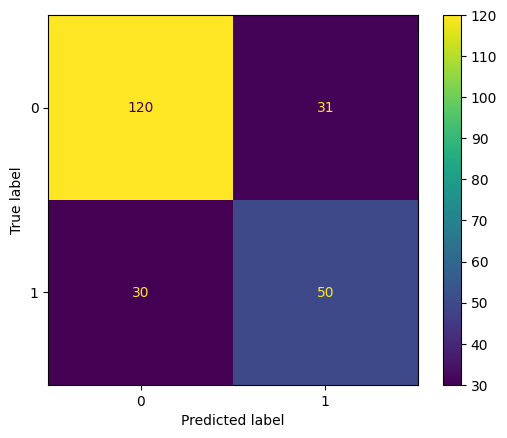

In [17]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [18]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

